In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [4]:
train = pd.read_csv('../data/tabular-playground-series-aug-2021/train.csv', index_col='id')
test = pd.read_csv('../data/tabular-playground-series-aug-2021/test.csv', index_col='id')

In [5]:
features = train.columns.values[:-1]
target = train.columns.values[-1]

X, y = train[features], train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

In [9]:
es = EarlyStopping(monitor='val_loss', patience=20)
mc = ModelCheckpoint('../best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train_scaled, y_train, 
          epochs=20, 
          callbacks= [es, mc], 
          batch_size=128, 
          validation_data=(X_test_scaled, y_test), 
          shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 2s 1ms/step - loss: 69.0858 - root_mean_squared_error: 8.3118 - val_loss: 62.8823 - val_root_mean_squared_error: 7.9298
Epoch 2/20
1563/1563 [==============================] - 1s 941us/step - loss: 64.9380 - root_mean_squared_error: 8.0584 - val_loss: 62.9474 - val_root_mean_squared_error: 7.9339
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 63.9372 - root_mean_squared_error: 7.9961 - val_loss: 62.8938 - val_root_mean_squared_error: 7.9306
Epoch 4/20
1563/1563 [==============================] - 2s 980us/step - loss: 63.4572 - root_mean_squared_error: 7.9660 - val_loss: 62.7291 - val_root_mean_squared_error: 7.9202
Epoch 5/20
1563/1563 [==============================] - 2s 962us/step - loss: 63.0926 - root_mean_squared_error: 7.9431 - val_loss: 62.5907 - val_root_mean_squared_error: 7.9114
Epoch 6/20
1563/1563 [==============================] - 2s 961us/step - loss: 63.0258 - root_mean_squared_error: 7

In [10]:
best_model = load_model('../best_model.h5')

(array([1.4209e+04, 2.0963e+04, 1.0743e+04, 3.1850e+03, 7.1000e+02,
        1.4200e+02, 3.4000e+01, 8.0000e+00, 4.0000e+00, 2.0000e+00]),
 array([ 5.290784 ,  6.1924686,  7.0941534,  7.995838 ,  8.897523 ,
         9.799208 , 10.700892 , 11.602577 , 12.504262 , 13.405947 ,
        14.3076315], dtype=float32),
 <a list of 10 Patch objects>)

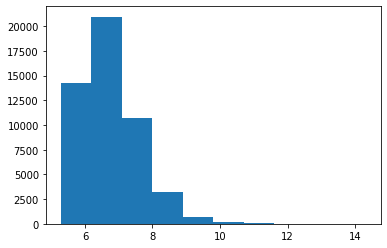

In [11]:
plt.hist(best_model.predict(X_test_scaled))

In [14]:
np.sqrt(mean_squared_error(y_test, best_model.predict(X_test_scaled)))

7.904774511223743

In [19]:
test['loss'] = best_model.predict(scaler.transform(test[features]))

In [20]:
test[['loss']].to_csv('../submission_keras.csv')